In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualisation

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

**Animal Crossing Villagers analyses**

I am only a couple months into playing animal crossing and currently have only 8 villagers so I am looking forward to some new ones. I thought I would use this great dataset I found to learn something about all the potential villagers I could end up with.

Firstly I'll add the data and take a look to decide what I actually want from it.

In [2]:
villagers = pd.read_csv('../input/animal-crossing-new-horizons-nookplaza-dataset/villagers.csv')
villagers.head()

,Name,Species,Gender,Personality,Hobby,Birthday,Catchphrase,Favorite Song,Style 1,Style 2,Color 1,Color 2,Wallpaper,Flooring,Furniture List,Filename,Unique Entry ID
0,Admiral,Bird,Male,Cranky,Nature,27-Jan,aye aye,Steep Hill,Cool,Cool,Black,Blue,dirt-clod wall,tatami,717;1849;7047;2736;787;5970;3449;3622;3802;410...,brd06,B3RyfNEqwGmcccRC3
1,Agent S,Squirrel,Female,Peppy,Fitness,2-Jul,sidekick,Go K.K. Rider,Active,Simple,Blue,Black,concrete wall,colorful tile flooring,7845;7150;3468;4080;290;3971;3449;1708;4756;25...,squ05,SGMdki6dzpDZyXAw5
2,Agnes,Pig,Female,Big Sister,Play,21-Apr,snuffle,K.K. House,Simple,Elegant,Pink,White,gray molded-panel wall,arabesque flooring,4129;7236;7235;7802;896;3428;4027;7325;3958;71...,pig17,jzWCiDPm9MqtCfecP
3,Al,Gorilla,Male,Lazy,Fitness,18-Oct,ayyyeee,Go K.K. Rider,Active,Active,Red,White,concrete wall,green rubber flooring,1452;4078;4013;833;4116;3697;7845;3307;3946;39...,gor08,LBifxETQJGEaLhBjC
4,Alfonso,Alligator,Male,Lazy,Play,9-Jun,it'sa me,Forest Life,Simple,Simple,Red,Blue,yellow playroom wall,green honeycomb tile,4763;3205;3701;1557;3623;85;3208;3584;4761;121...,crd00,REpd8KxB8p9aGBRSE


It does all look very interesting but I've decided I only want 5 of the columns.

In [3]:
useful_cols = ['Name', 'Species', 'Gender', 'Personality', 'Birthday']
villagers = villagers[useful_cols]
print('Number of villagers:')
villagers['Name'].count()

Number of villagers:


391

The data is all ready and we now know that there are 391 potential villagers in total (this may come up again...).
Now let's start considering some questions about villagers.

**Analysis 1**

Firstly,  I really want to find out the connection between Al and Derwin. They were two of my villagers and whenever I gave them a specific present I always got the same annoying response.So now I really want to know why.

In [4]:
my_villagers = ['Al', 'Derwin']
villagers.loc[villagers['Name'].isin(my_villagers)]

,Name,Species,Gender,Personality,Birthday
3,Al,Gorilla,Male,Lazy,18-Oct
110,Derwin,Duck,Male,Lazy,25-May


Aha, it looks like they are both Lazy. Perhaps it's the response of all Lazy villagers. I'll just take a quick look at all Lazy villagers to confirm that i don't have any others.

In [5]:
villagers.loc[villagers['Personality'] == 'Lazy']

,Name,Species,Gender,Personality,Birthday
3,Al,Gorilla,Male,Lazy,18-Oct
4,Alfonso,Alligator,Male,Lazy,9-Jun
9,Anchovy,Bird,Male,Lazy,4-Mar
27,Barold,Cub,Male,Lazy,2-Mar
30,Beau,Deer,Male,Lazy,5-Apr
33,Benedict,Chicken,Male,Lazy,10-Oct
34,Benjamin,Dog,Male,Lazy,3-Aug
39,Big Top,Elephant,Male,Lazy,3-Oct
42,Biskit,Dog,Male,Lazy,13-May
47,Bob,Cat,Male,Lazy,1-Jan


More than i thought but I'm happy to confirm i don't have any more  Lazy villagers. That suggests some of the replies we get from villagers following gifts are based on their personality.

**Analysis 2**

Well now that I've seen how many villagers are Lazy I'm interested in knowing more about the various personalities.
Let's start by finding out how many personality types there are and how many villagers belong to each personality.

In [6]:
villagers['Personality'].value_counts().to_frame()

,Personality
Lazy,60
Normal,59
Cranky,55
Snooty,55
Jock,55
Peppy,49
Smug,34
Big Sister,24


It looks like Lazy is actually the most common personality. That means I might have to hear those phrases a bit more...

**Analysis 3**

Now another thing I have noticed is that it's about to be one of my villagers birthdays, this is the first birthday in my game and I'm looking forward to it but I'd like to know more about the birthdays of all the villagers.
We already know that there are 391 villagers so there must be at least 26 shared birthdays. However, I know from probability theory and the birthday paradox that in  the real world people in a group will share birthdays when the group is bigger than 23 people. So surely there will be more than 26 shared birthdays...
Anyway, let's see which dates are the birthday off more than one villager.

In [7]:
birthdays = villagers['Birthday'].value_counts().to_frame().reset_index().rename(columns={'Birthday': 'Count', 'index': 'Birthday'})
shared_birthdays = birthdays[birthdays['Count'] >= 2]
shared_birthdays

,Birthday,Count
0,27-Jan,2
1,5-Dec,2
2,31-Jul,2
3,26-Mar,2
4,3-Aug,2
5,13-Oct,2
6,27-Jul,2
7,25-Mar,2
8,6-Oct,2
9,15-Oct,2


So there are 30 dates that are the birthday of 2 villagers, more than the minimum of 26 but less than there likely would be in the real world. I'll quickly take a look at how spread out these dates are.

<BarContainer object of 12 artists>

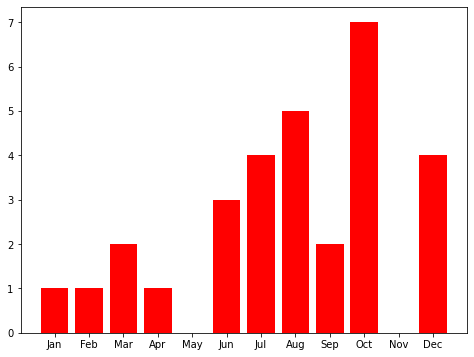

In [8]:
month_list = []
for date in shared_birthdays['Birthday'].to_list():
    month = date[-3:]
    month_list.append(month)
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
count = []
for month in months:
    count.append(month_list.count(month))
count
plt.figure(figsize=(8, 6))
plt.bar(months, count, color = 'r')

Well there's clearly many more shared birthdays as the year goes on. I wonder if anyone's ever had villagers actually share a birthday?

**Analysis 4**

Finally, another thing I am interested in is the different animals the villagers can be, because I currently have a very scary looking mouse and I once met a unicorn who I could not persuade to become a villager. Let's find out what other animals there are.

In [9]:
species_count = villagers['Species'].value_counts().to_frame().reset_index().rename(columns={'Species': 'Count', 'index': 'Species'})
species_count

,Species,Count
0,Cat,23
1,Rabbit,20
2,Frog,18
3,Squirrel,18
4,Duck,17
5,Dog,16
6,Cub,16
7,Pig,15
8,Bear,15
9,Mouse,15


So there are 23 cats yet only 3 octopi, I'm surprised I've yet to meet a cat...
Interestingly there's no unicorns; a quick Google search leads me to realise that the unicorn is actually a horse made to look like a unicorn. And apparently there's 15 mice! I really hope they're not all as scary looking as my current one!

Anyway, this now makes me wonder whether there's a similar ratio of male to female villagers in each species, or are some species more likely to be a specific gender? To make the results clearer I will only focus on species with a count of 15 or more.

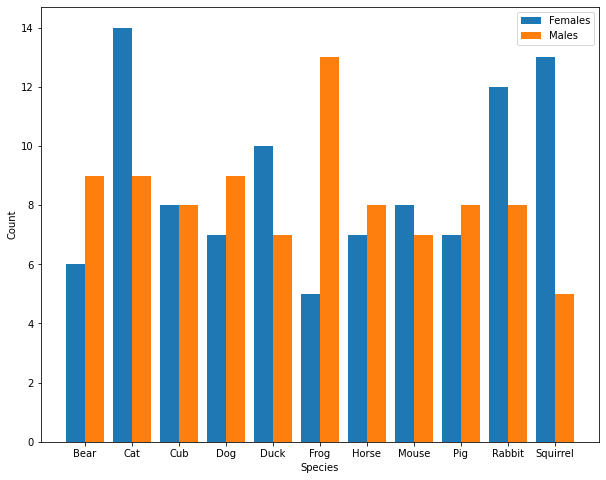

In [10]:
species = species_count['Species'][species_count['Count'] >= 15].to_list()
species.sort()
villager_type = villagers[['Species', 'Gender']][villagers['Species'].isin(species)].value_counts().sort_index().to_frame().reset_index(level=['Species', 'Gender']).rename(columns={0: 'Count'})
females = villager_type['Count'][villager_type['Gender'] == 'Female'].to_list()
males = villager_type['Count'][villager_type['Gender'] == 'Male'].to_list()

x_axis = np.arange(len(species))

plt.figure(figsize = (10, 8))
plt.bar(x_axis-0.2, females, 0.4, label = 'Females')
plt.bar(x_axis+0.2, males, 0.4, label = 'Males')
plt.xticks(x_axis, species)
plt.xlabel('Species')
plt.ylabel('Count')
plt.legend()

Well it looks like most species are split equally by gender yet apparently cats, rabbits and squirrels are more likely to be female while frogs are more likely to be male. Makes me wonder if this was deliberate but who knows if we'll ever know...

**Thanks**

Anyway, I can't currently think of anything else and this was already getting slightly long so I'll stop here. Perhaps this was intersting to someone, and if not it was good practice for me. Please comment if you notice any code that isn't clear or if I could have made any of the code simpler.
Thanks for taking a look.